Import necessary libraries:

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pandas.plotting import scatter_matrix

### At first, I will load data and check if it needs cleaning

I load data from _.csv_ file:

In [2]:
df = pd.read_csv("abalone.csv", sep=',')

I make a copy :)

In [3]:
df_copy = df.copy(deep = True)

And look what do we have here:

In [4]:
df_copy.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age group
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,senior abalone
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,mature abalone
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,mature abalone
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,middle-aged abalone
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,mature abalone


So, first thing to do is to **change strings to integers**.  

Let's see what how many categories we have in **Age group**:

In [5]:
df_copy.groupby(['Age group']).size()

Age group
mature abalone         1648
middle-aged abalone    1388
senior abalone          693
young abalone           448
dtype: int64

#### Now I change strings to integers  in **Age group**:
I could do this automatically using LabelEncoder, but I want to have values growing with the age, as below: 
- young -> 1
- mature -> 2
- middle-age -> 3
- senior -> 4  


So, I will change it 'by hand' ;)

In [6]:
d = {'young abalone':1,'mature abalone':2,'middle-aged abalone':3, 'senior abalone':4}
df_copy = df_copy.replace(d)

Does it work?

In [7]:
df_copy.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age group
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,4
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,3
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,2


Yup! No it's time for _Sex_ feature:

In [8]:
df_copy.groupby(['Sex']).size()

Sex
F    1307
I    1342
M    1528
dtype: int64

Here numbers can be selected randomly, so I will change it using LabelEncoder :)

In [9]:
le = preprocessing.LabelEncoder()

In [10]:
df_copy['Sex'] = le.fit_transform(df_copy['Sex'])

Does this method work too?

In [11]:
df_copy.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age group
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,4
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,3
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,2


Yes! :)

### Next I will check some informations:

Shape:

In [12]:
df_copy.shape

(4177, 10)

Basic informations:

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age group       4177 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 326.5 KB


I check if there are any null objects:

In [14]:
df_copy.isnull().values.any()

False

And check how many duplicates do we have:

In [15]:
df_copy.duplicated().sum()

0

Let's see basic statistics:

In [16]:
df_copy.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age group
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,2.556859
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.890664
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,2.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,2.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,3.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,4.000000


#### It looks like we can have some outliers in _Height_, _Shucked weight_ and _Shell weight_.  
Check it out!

#### Height

In [17]:
df_copy.groupby(['Height']).size()

Height
0.000      2
0.010      1
0.015      2
0.020      2
0.025      5
0.030      6
0.035      6
0.040     13
0.045     11
0.050     18
0.055     25
0.060     26
0.065     39
0.070     47
0.075     61
0.080     76
0.085     74
0.090    124
0.095     91
0.100    145
0.105    114
0.110    135
0.115    133
0.120    169
0.125    202
0.130    169
0.135    189
0.140    220
0.145    182
0.150    267
0.155    217
0.160    205
0.165    193
0.170    160
0.175    211
0.180    131
0.185    103
0.190    103
0.195     78
0.200     68
0.205     45
0.210     23
0.215     31
0.220     17
0.225     13
0.230     10
0.235      6
0.240      4
0.250      3
0.515      1
1.130      1
dtype: int64

There are to zeros (0.000) and one 1.130. In my opinion all three values are not correct.  
What I can do with it is to replace values by e.g. mean or I can just drop these rows.  
We have more than 4000 observations, so if I drop 3 rows it will not make big difference.

So, which rows should I drop?

In [18]:
height_outliers = ['0.000', '1.130']

df_copy.loc[df_copy['Height'].isin(height_outliers)]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age group


Ok, let's do this:

In [19]:
to_drop = [1257,2051,3996]
df_copy.drop(to_drop, inplace=True, axis=0)

Did it work?

In [20]:
df_copy.loc[df_copy['Height'].isin(height_outliers)]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age group


Yes, it's quite clean here ;)

#### Shucked weight

In [21]:
df_copy.groupby(['Shucked weight']).size()

Shucked weight
0.0010    1
0.0025    1
0.0045    2
0.0050    3
0.0055    2
         ..
1.2455    1
1.2530    1
1.3485    1
1.3510    1
1.4880    1
Length: 1515, dtype: int64

Hmm, these values look good. Nothing to change.

#### Shell weight

In [22]:
df_copy.groupby(['Shell weight']).size()

Shell weight
0.0015     1
0.0030     1
0.0035     1
0.0040     2
0.0050    12
          ..
0.8150     1
0.8500     1
0.8850     2
0.8970     1
1.0050     1
Length: 925, dtype: int64

This feature also is ok. 

## How looks our data after cleaning?

In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4174 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4174 non-null   int64  
 1   Length          4174 non-null   float64
 2   Diameter        4174 non-null   float64
 3   Height          4174 non-null   float64
 4   Whole weight    4174 non-null   float64
 5   Shucked weight  4174 non-null   float64
 6   Viscera weight  4174 non-null   float64
 7   Shell weight    4174 non-null   float64
 8   Rings           4174 non-null   int64  
 9   Age group       4174 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 358.7 KB


In [24]:
df_copy.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age group
count,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000
mean,1.053186,0.524081,0.407953,0.139346,0.829061,0.359483,0.180668,0.238859,9.935553,2.557499
std,0.822374,0.120079,0.099228,0.038811,0.490395,0.221980,0.109614,0.139219,3.224474,0.890574
min,0.000000,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.442125,0.186125,0.093500,0.130000,8.000000,2.000000
50%,1.000000,0.545000,0.425000,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000,2.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153750,0.502000,0.253000,0.328875,11.000000,3.000000
max,2.000000,0.815000,0.650000,0.515000,2.825500,1.488000,0.760000,1.005000,29.000000,4.000000


### Histograms time :)

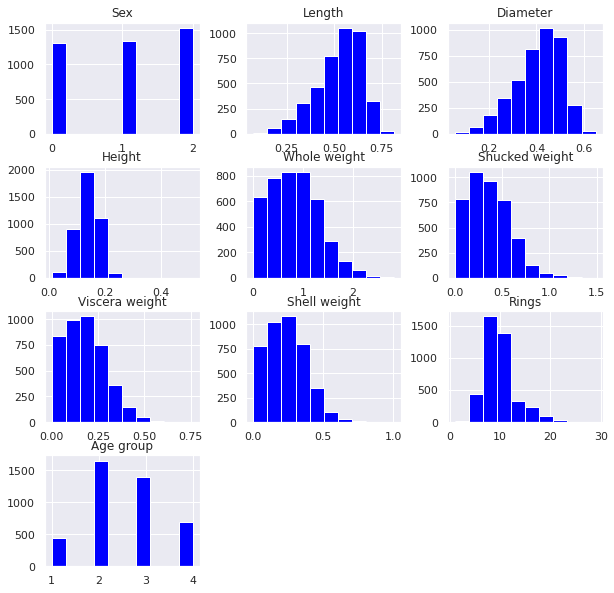

In [25]:
sns.set()
df_copy.hist(figsize=(10,10), color='blue')
plt.show()

### Scatter matrix

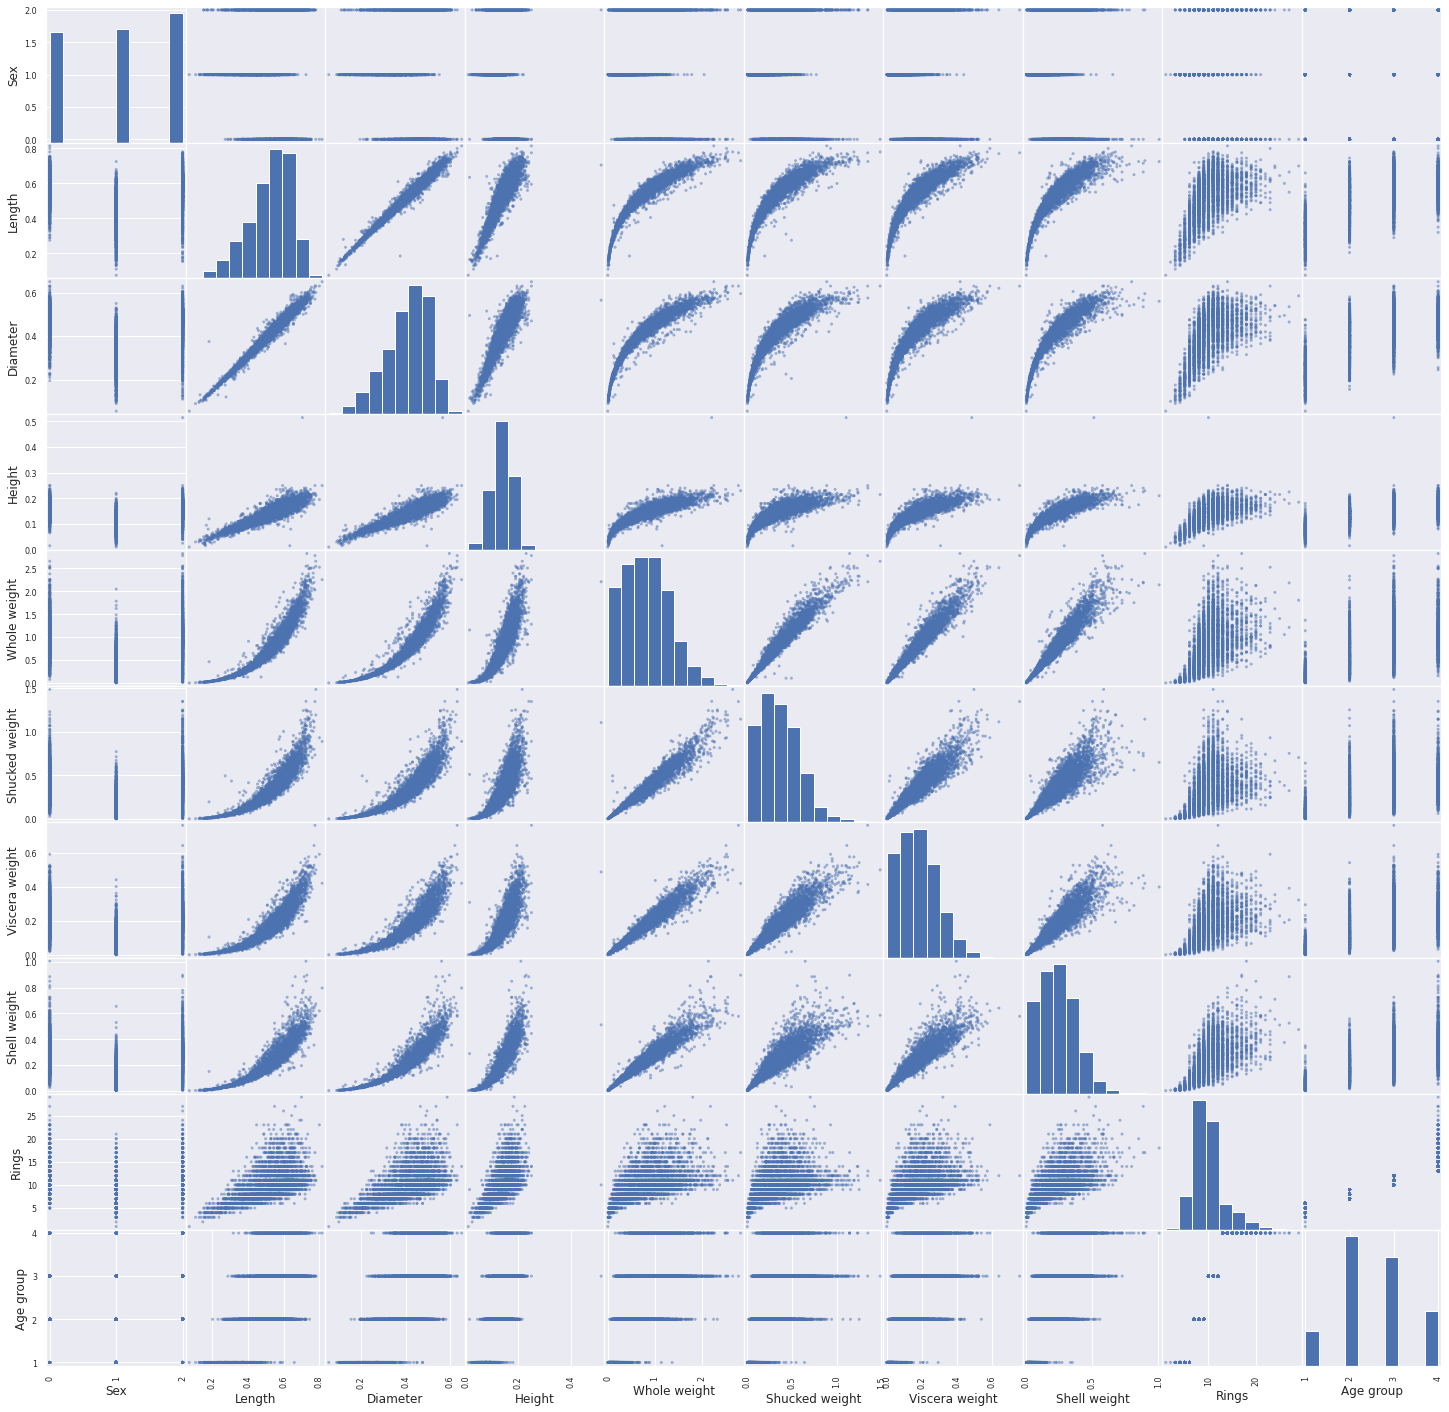

In [26]:
p=scatter_matrix(df_copy,figsize=(25, 25))

But at first I'll check how does look _Age Group_ in here:

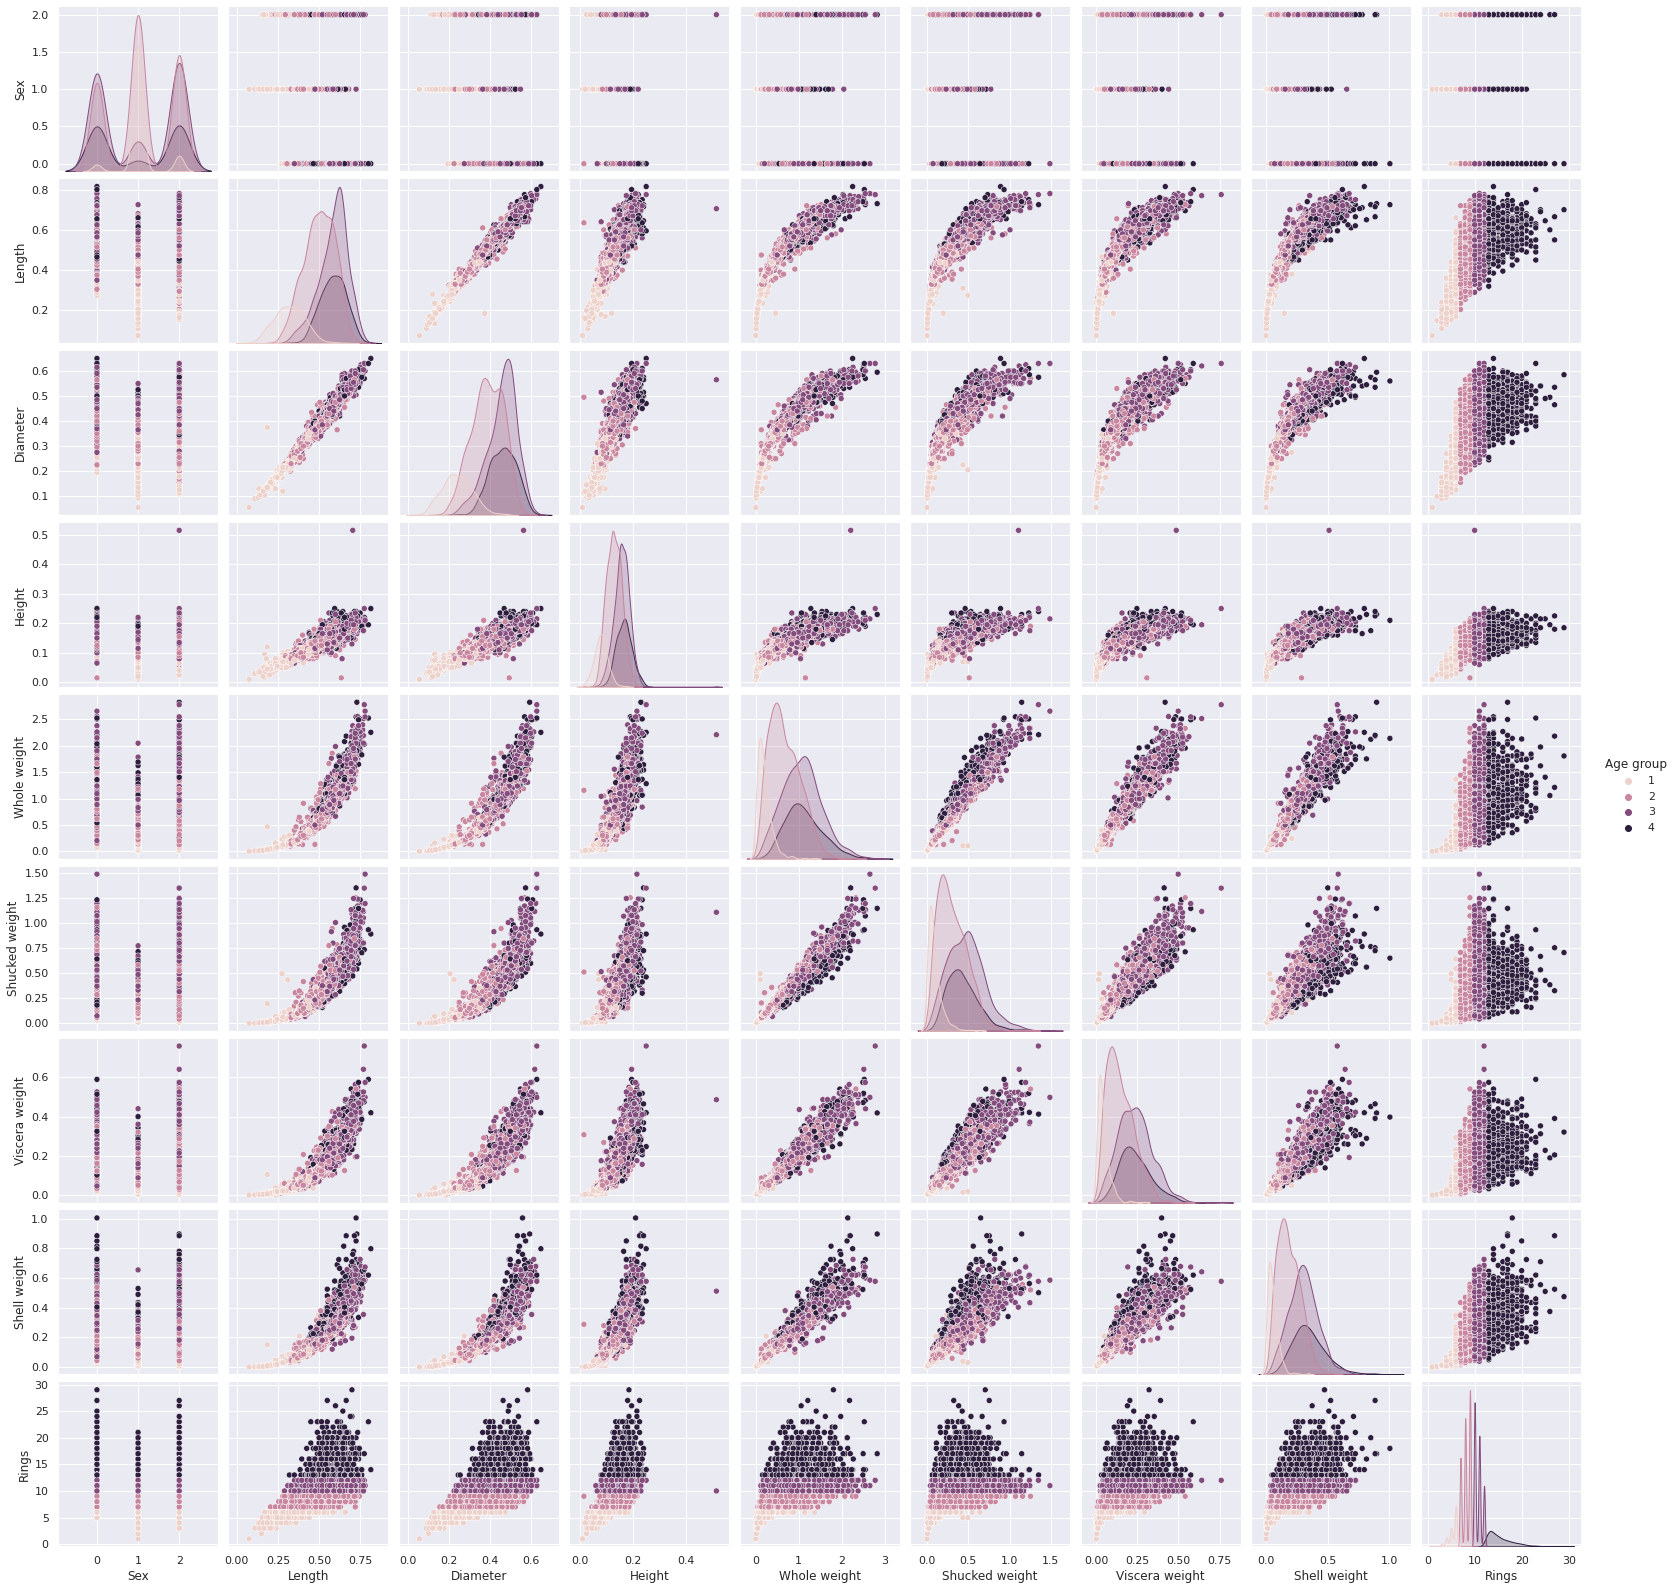

In [27]:
p=sns.pairplot(df_copy, hue = 'Age group')

### Correlation

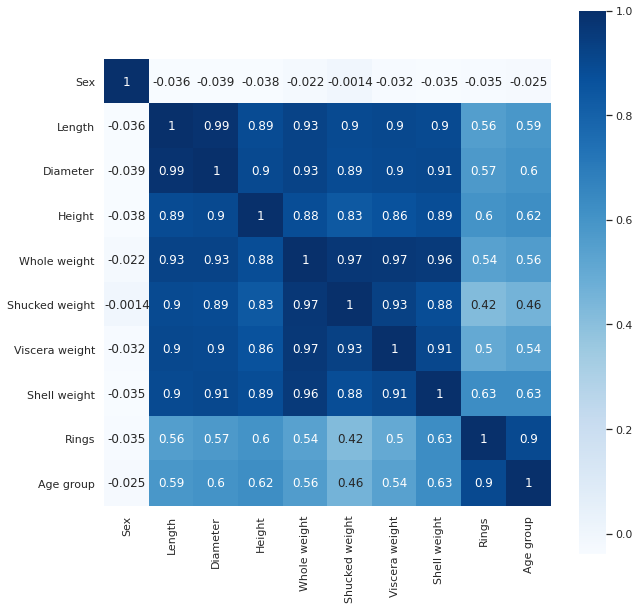

In [28]:
correlation = df_copy.corr()

fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

Wow! Almost every pair of features (without _Sex_ ) has a strong positive correlation (corr > 0.41)! It's important information when we are creating a model.

#### So, our target is to categorize abalones to correct age group based on the feature other than number of rings. Except _Rings_ , the most correlated with _Age group_ features are: 
- _Shell weight,_ correlation = 0.63
- _Height,_ correlation = 0.62

Diameter and length have also comparable correlations (0.6 and 0.59), but I will focus on these two above. I don't want to use too many features, especially that all of them have quite strong and strong correlations with each other. Model can give incorrect results if features which were used are correlated.

#### Remember, that _Shell weight_ and _Height_ are strongly correlated  (correlation = 0.89)!!!

## Models

All models which I will create:
* are **classifiers**, not regressors - _it is because our target feature, Age group, contains classes, it is not continuous,_
* have test size = 0.2,
* have random state = 42.

## To be continued...